# Clustering Crypto

In [1]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%opts magic unavailable (pyparsing cannot be imported)
%compositor magic unavailable (pyparsing cannot be imported)


### Deliverable 1: Preprocessing the Data for PCA

In [2]:
# Load the crypto_data.csv dataset.

file_path = "crypto_data.csv"
df_crypto = pd.read_csv(file_path, index_col=0)
df_crypto.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Keep all the cryptocurrencies that are being traded.

df_crypto = df_crypto.loc[df_crypto['IsTrading']==True]
print(df_crypto.shape)
df_crypto.head()

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Keep all the cryptocurrencies that have a working algorithm.
    # N/A

In [5]:
# Remove the "IsTrading" column. 

df_crypto.drop(columns=['IsTrading'], inplace=True)
df_crypto.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
for column in df_crypto.columns:
    print (f"Column {column} has {df_crypto[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [7]:
# Remove rows that have at least 1 null value.

df_crypto = df_crypto.dropna()
df_crypto.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [8]:
for column in df_crypto.columns:
    print (f"Column {column} has {df_crypto[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [9]:
# Keep the rows where coins are mined.

df_crypto = df_crypto[df_crypto['TotalCoinsMined'] > 0]
print(df_crypto.shape)
df_crypto.head()

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [10]:
# Create a new DataFrame that holds only the cryptocurrencies names.

coin_name_df = df_crypto['CoinName']
coin_name_df = pd.DataFrame(coin_name_df)
print(coin_name_df.shape)
coin_name_df.head()

(532, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [11]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.

df_crypto = df_crypto.drop('CoinName', axis=1)
print(df_crypto.shape)
df_crypto.head()

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
# Use get_dummies() to create variables for text features.

df_crypto_dummies = pd.get_dummies(df_crypto, columns=['Algorithm', 'ProofType'])
df_crypto_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
404,1.055185e+09,532000000,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1337,2.927942e+10,314159265359,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
BTC,1.792718e+07,21000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ETH,1.076842e+08,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Standardize the data with StandardScaler().

crypto_scaled = StandardScaler().fit_transform(df_crypto_dummies)
print(crypto_scaled)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


### Deliverable 2: Reducing Data Dimensions Using PCA

In [14]:
# Using PCA to reduce dimension to three principal components.

pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)

In [15]:
# Create a DataFrame with the three principal components.

df_crypto_pca = pd.DataFrame(data=crypto_pca, 
                             columns=['PC 1', 'PC 2', 'PC 3'],
                             index=df_crypto.index)
df_crypto_pca.head()

,PC 1,PC 2,PC 3
42,-0.335598,1.069474,-0.517722
404,-0.318949,1.069772,-0.518085
1337,2.301771,1.716399,-0.584822
BTC,-0.152438,-1.313061,0.181592
ETH,-0.159757,-2.023920,0.340173


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [16]:
# Create an elbow curve to find the best value for K.

inertia = []
k = list(range(1, 11))

# Loop through k values to calculate inertia
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Create elbow  
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x='k', y='inertia', xticks=k, title= 'Elbow Curve')

C:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [17]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)
model

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)
print(predictions)

[1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1
 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 3 1 0 0 0 1 3 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 3 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 1 0 1 

C:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([df_crypto, df_crypto_pca], axis = 1)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = coin_name_df['CoinName']

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head()

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.335598,1.069474,-0.517722,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.318949,1.069772,-0.518085,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.301771,1.716399,-0.584822,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.152438,-1.313061,0.181592,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.159757,-2.023920,0.340173,Ethereum,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

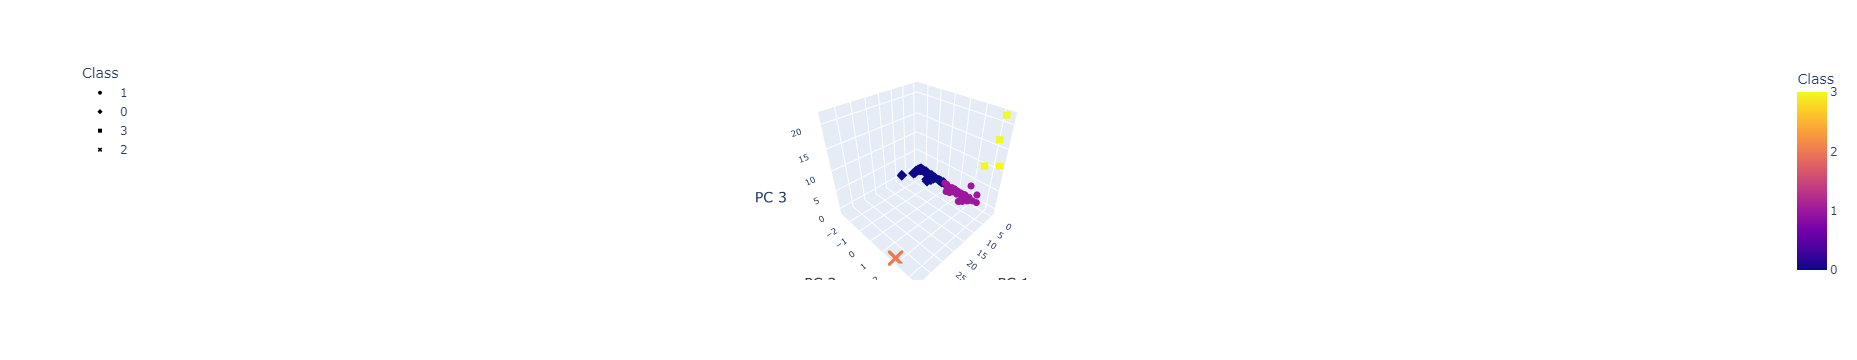

In [34]:
# Creating a 3D-Scatter with the PCA data and the clusters

fig = px.scatter_3d(clustered_df,
                    x="PC 1",
                    y="PC 2",
                    z="PC 3",
                    color="Class",
                    symbol="Class",
                    hover_name ='CoinName',
                    hover_data=['Algorithm'],
                    width=650)

# Update tick font size
fig.update_layout(
    scene=dict(
        xaxis=dict(tickfont=dict(size=10)),
        yaxis=dict(tickfont=dict(size=10)),
        zaxis=dict(tickfont=dict(size=10))
    ),
    legend=dict(x=0, y=1)
)

# Update marker size
fig.update_traces(marker=dict(size=4))

fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [20]:
# Create a table with tradable cryptocurrencies.

clustered_df.hvplot.table(columns=['CoinName',
                                   'Algorithm',
                                   'ProofType',
                                   'TotalCoinSupply',
                                   'TotalCoinsMined',
                                   'Class'],
                                    sortable=True,
                                    selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [21]:
# Print the total number of tradable cryptocurrencies.

print(f'Total number of tradable cryptocurrencies: {len(clustered_df)}')

Total number of tradable cryptocurrencies: 532


In [22]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.

scaled_data = clustered_df[['TotalCoinSupply', 'TotalCoinsMined']]
scaled_and_clustered = MinMaxScaler().fit_transform(scaled_data)
scaled_and_clustered

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [23]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
scaled_and_clustered_df = pd.DataFrame(scaled_and_clustered, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
scaled_and_clustered_df['CoinName'] = clustered_df['CoinName']

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
scaled_and_clustered_df['Class'] = clustered_df['Class']

scaled_and_clustered_df.head()

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.141593e-01,0.029576,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0


In [41]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
scaled_and_clustered_df.hvplot.scatter(x='TotalCoinsMined',
                                       y='TotalCoinSupply',
                                       by='Class',
                                       hover_cols = 'CoinName',
                                       s=12)


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)